### Benjamin Bartek bbartek@my365.bellevue.edu
### DSC 680 Project 2 - NFL 2023 Season Data Analysis

## 1. Load Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## 2. Load Data

In [2]:

game_results_path = "nfl_2023_game_results.csv"
team_stats_path = "team_stats.csv"

game_results = pd.read_csv(game_results_path)
team_stats = pd.read_csv(team_stats_path)


## 3. Descriptive Statistics and Initial Visualizations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   week        272 non-null    int64 
 1   game_id     272 non-null    int64 
 2   away        272 non-null    object
 3   away_score  272 non-null    int64 
 4   home        272 non-null    object
 5   home_score  272 non-null    int64 
 6   total       272 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 15.0+ KB
None
             week     game_id  away_score  home_score       total
count  272.000000  272.000000  272.000000  272.000000  272.000000
mean     9.477941  136.500000   20.919118   22.661765   43.580882
std      5.307471   78.663842    9.402485    9.160496   13.894996
min      1.000000    1.000000    0.000000    3.000000   10.000000
25%      5.000000   68.750000   15.000000   16.000000   34.000000
50%      9.500000  136.500000   20.000000   23.000000   42.000000
75%     14.000000 

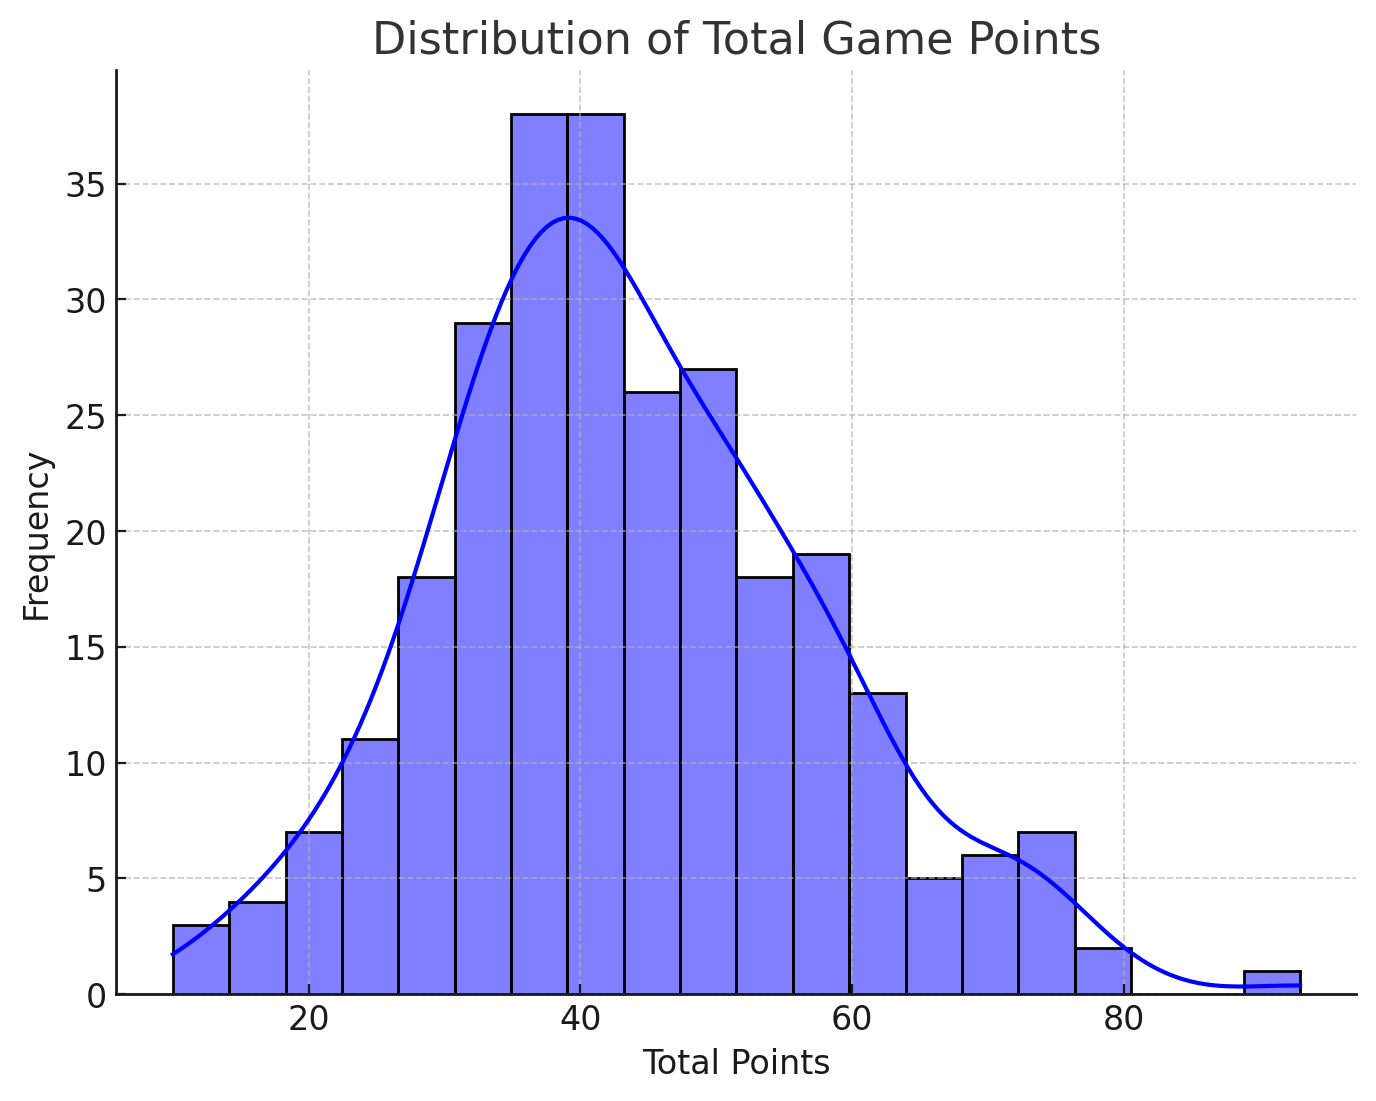

In [3]:

# Overview of the datasets
print(game_results.info())
print(game_results.describe())

print(team_stats.info())
print(team_stats.describe())

# Distribution of Total Points
plt.figure(figsize=(8, 6))
sns.histplot(game_results['total'], kde=True, bins=20, color="blue")
plt.title("Distribution of Total Game Points")
plt.xlabel("Total Points")
plt.ylabel("Frequency")
plt.show()


## 4. Correlation Analysis

/tmp/ipykernel_244/505791869.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = team_stats.corr()


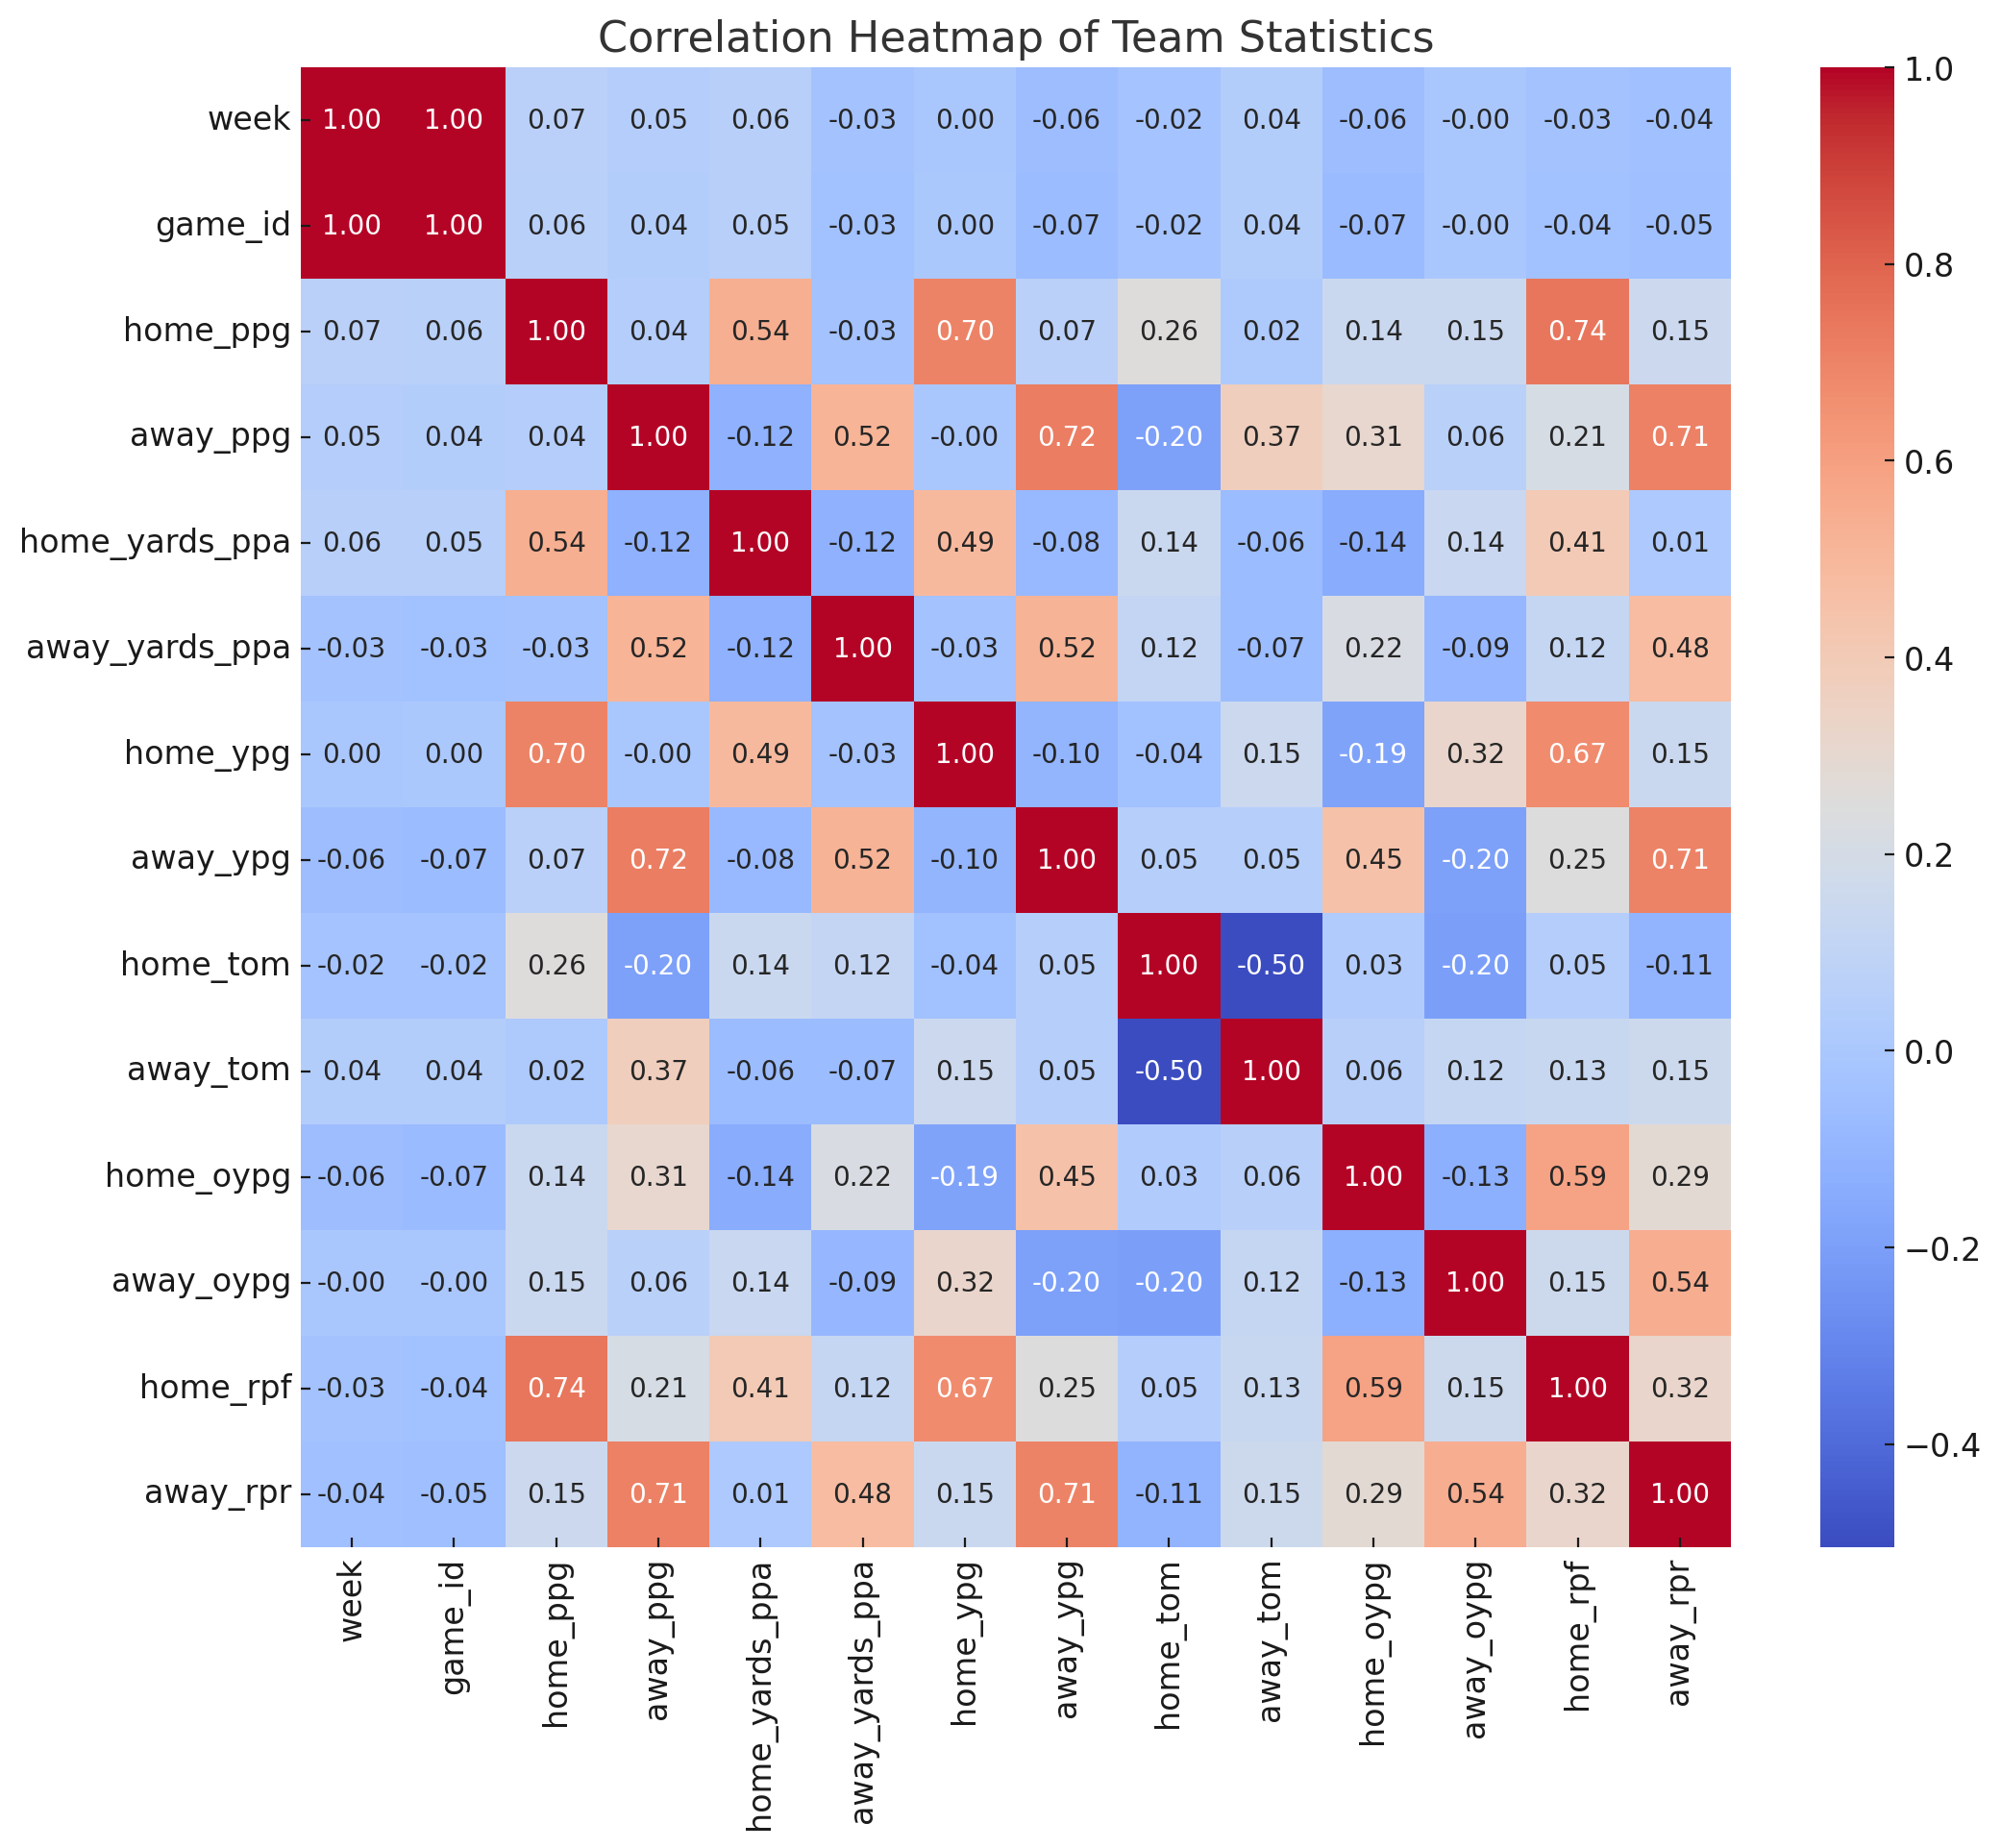

In [4]:

# Correlation heatmap for team statistics
plt.figure(figsize=(12, 10))
correlation_matrix = team_stats.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Team Statistics")
plt.show()


## 5. Predictive Modeling - Classification

[[15  8]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70        23
           1       0.77      0.84      0.81        32

    accuracy                           0.76        55
   macro avg       0.76      0.75      0.75        55
weighted avg       0.76      0.76      0.76        55



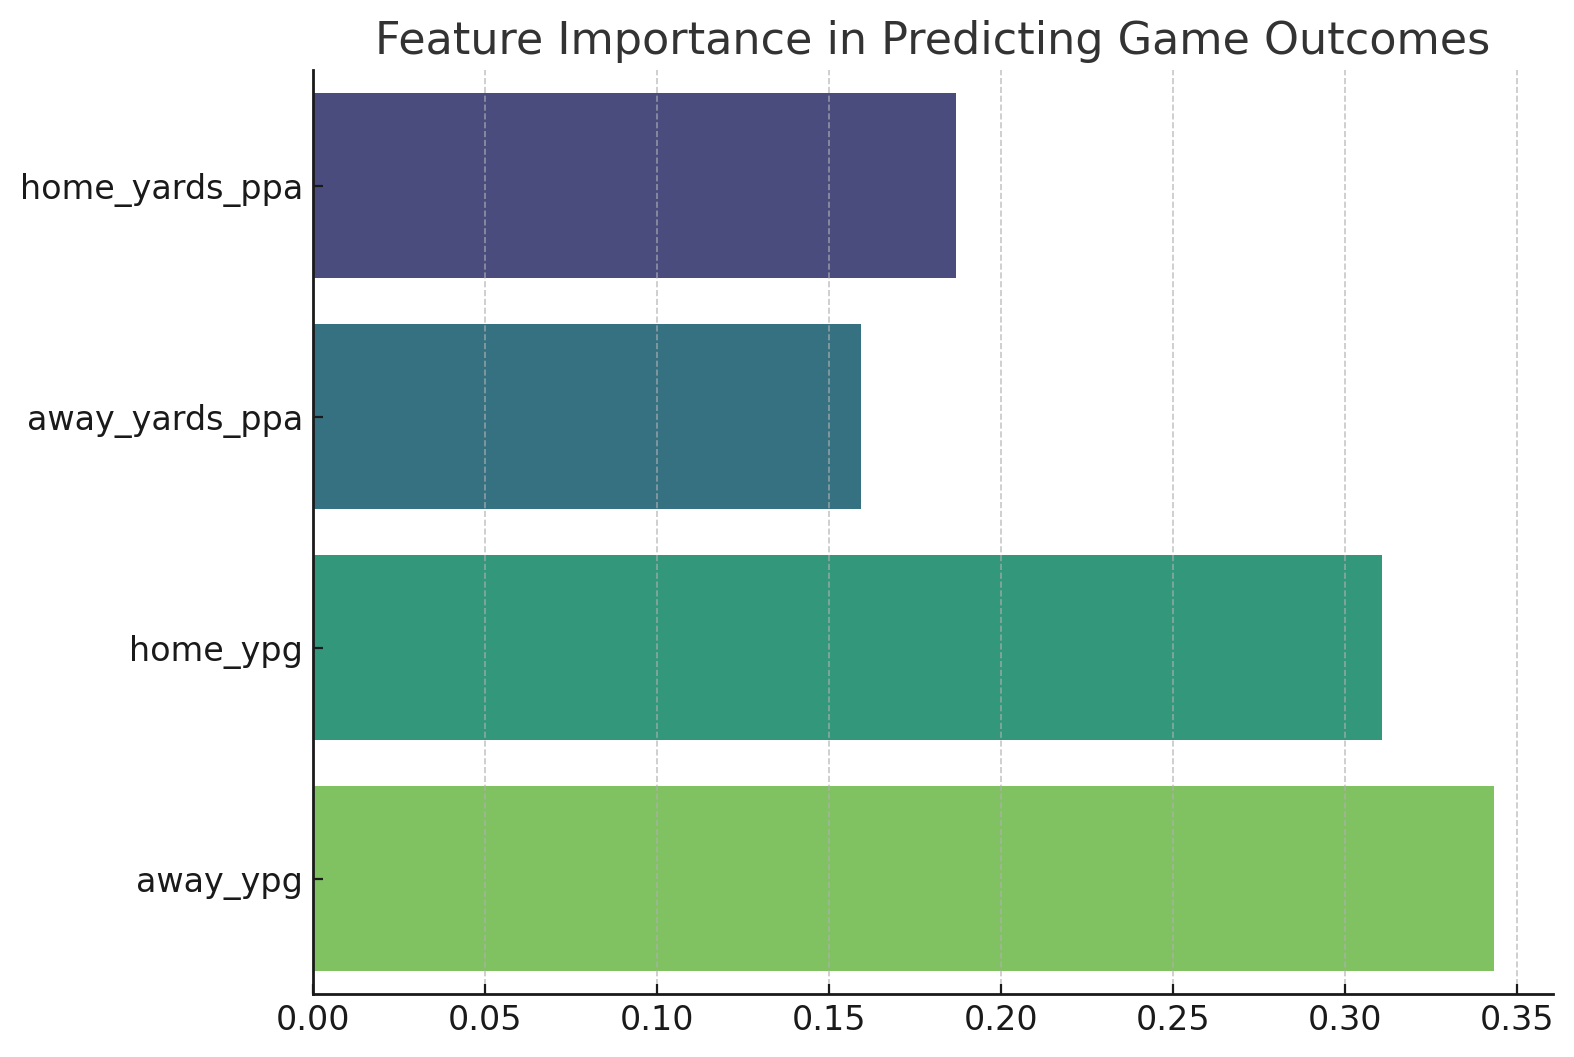

In [5]:

# Prepare data for modeling
team_stats["win"] = (team_stats["home_ppg"] > team_stats["away_ppg"]).astype(int)
X = team_stats[["home_yards_ppa", "away_yards_ppa", "home_ypg", "away_ypg"]]
y = team_stats["win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature Importance Analysis
feature_importances = model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=X.columns, palette="viridis")
plt.title("Feature Importance in Predicting Game Outcomes")
plt.show()


## 6. Predictive Modeling - Regression

Mean Squared Error: 141.32
R^2 Score: 0.28


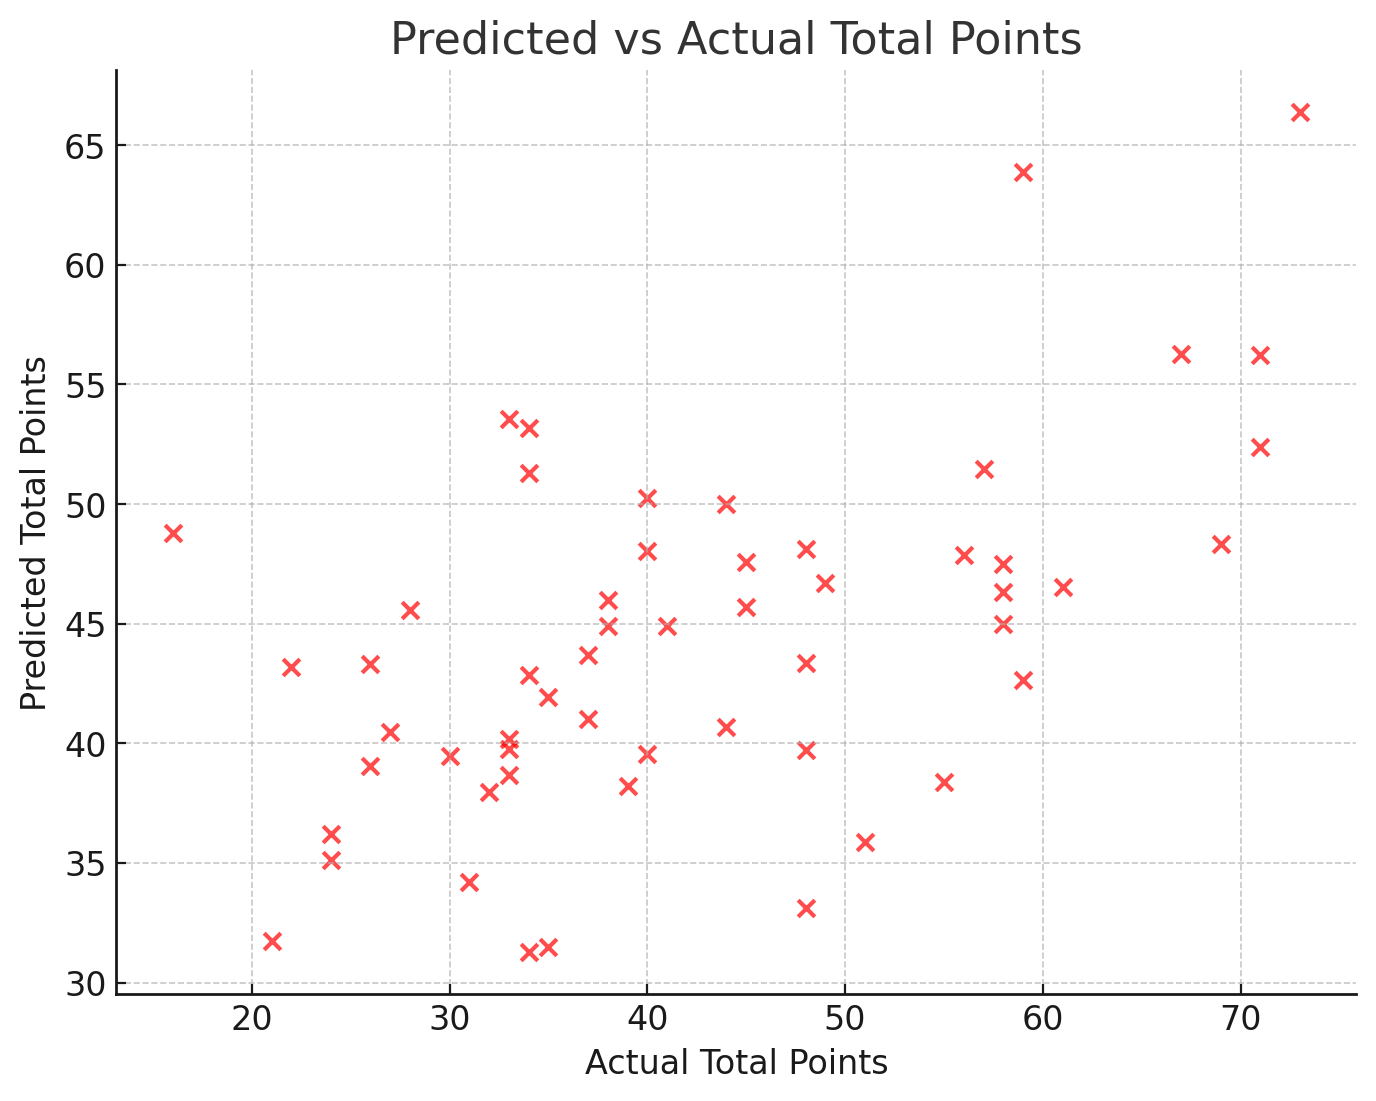

In [6]:

# Regression to predict total points
X_reg = team_stats[["home_ppg", "away_ppg", "home_ypg", "away_ypg"]]
y_reg = game_results["total"]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Predictions and Evaluation
y_pred_reg = regressor.predict(X_test_reg)
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"R^2 Score: {r2_score(y_test_reg, y_pred_reg):.2f}")

# Visualizing Predicted vs Actual Scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.7, color="red")
plt.title("Predicted vs Actual Total Points")
plt.xlabel("Actual Total Points")
plt.ylabel("Predicted Total Points")
plt.show()


## 7. Clustering Analysis

/home/sandbox/.local/lib/python3.11/site-packages/seaborn/relational.py:658: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


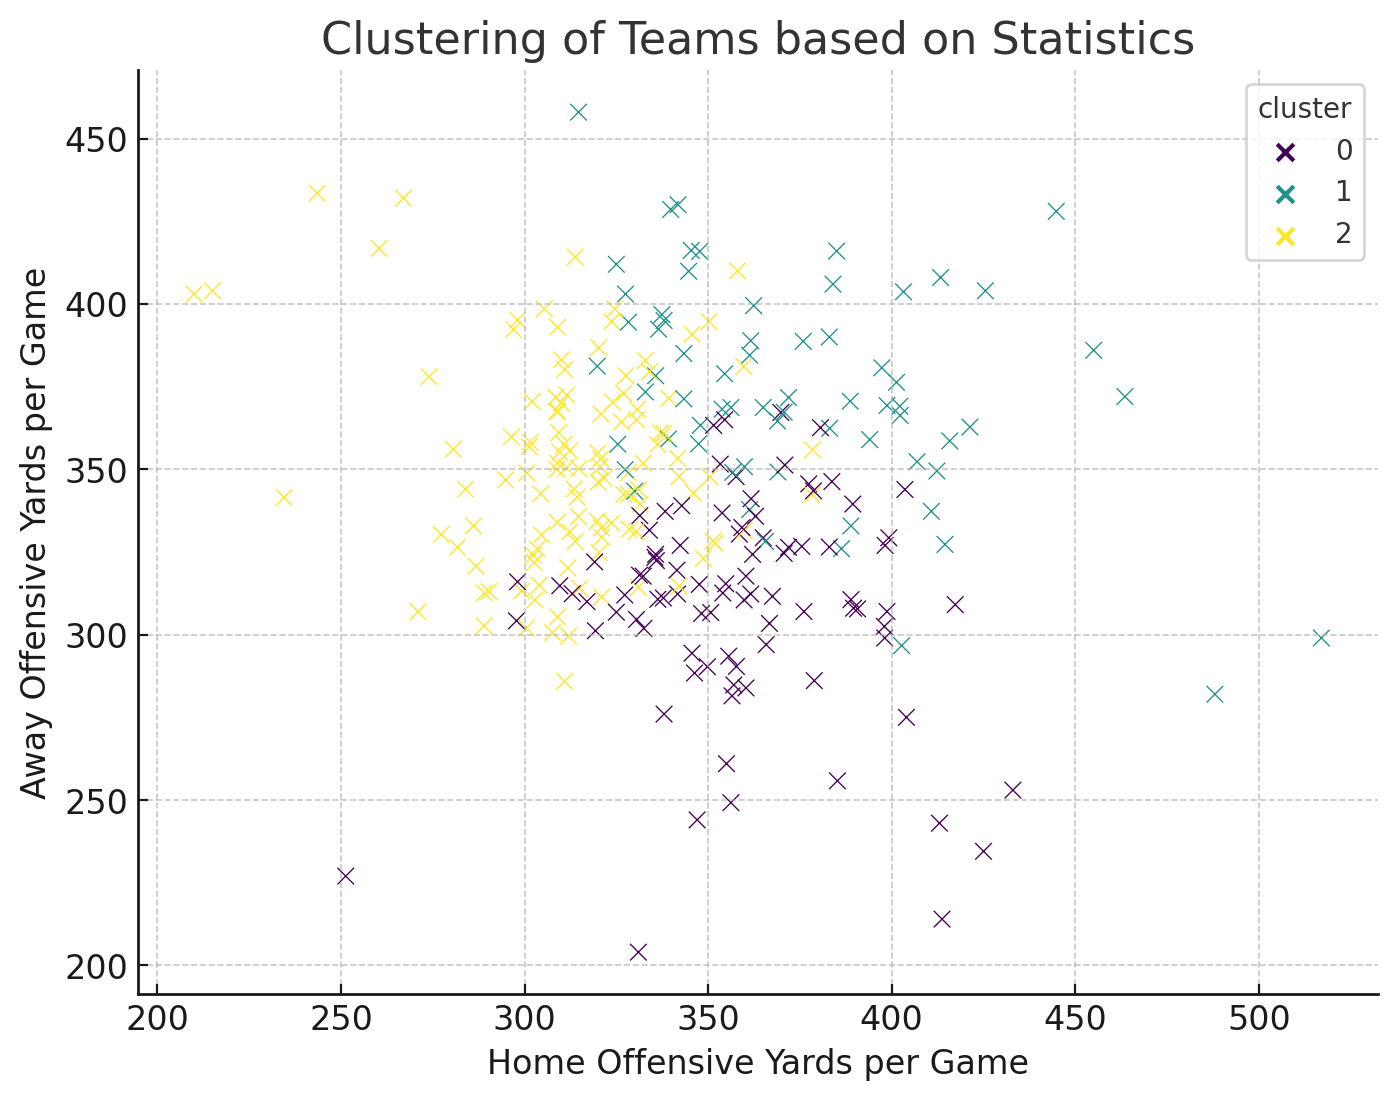

In [7]:

# Clustering team statistics
features = ["home_oypg", "away_oypg", "home_rpf", "away_rpr"]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(team_stats[features])

kmeans = KMeans(n_clusters=3, random_state=42)
team_stats["cluster"] = kmeans.fit_predict(scaled_features)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=team_stats, x="home_oypg", y="away_oypg", hue="cluster", palette="viridis")
plt.title("Clustering of Teams based on Statistics")
plt.xlabel("Home Offensive Yards per Game")
plt.ylabel("Away Offensive Yards per Game")
plt.show()
